In [1]:
import numpy as np
from scipy import optimize
from collections import namedtuple
from functools import partial
import matplotlib.pyplot as plt

In [2]:
def capital_demand(R, α):
    return (α/R)**(1/(1-α)) 

In [3]:
def capital_supply(R, β, w):
    R = np.ones_like(R)
    return R * (β / (1 + β)) * w

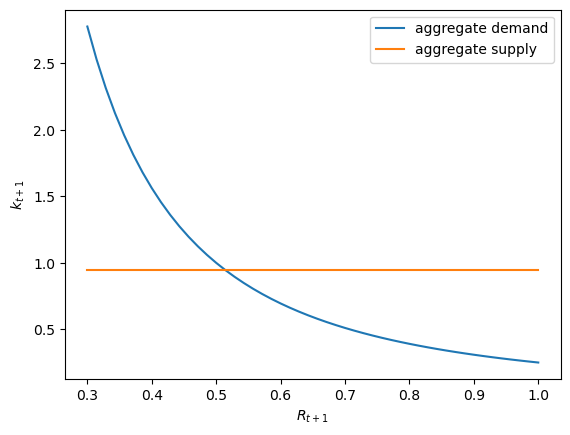

In [4]:
R_vals = np.linspace(0.3, 1)
α, β = 0.5, 0.9
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, α), 
        label="aggregate demand")
ax.plot(R_vals, capital_supply(R_vals, β, w), 
        label="aggregate supply")

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

In [5]:
def equilibrium_R_log_utility(α, β, w):
    R = α * ( (β * w) / (1 + β))**(α - 1)
    return R

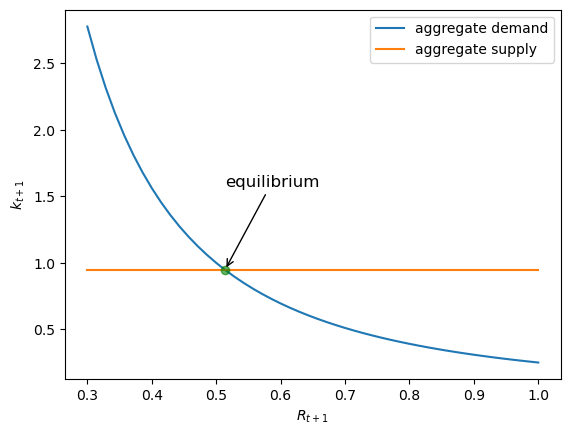

In [6]:
R_vals = np.linspace(0.3, 1)
α, β = 0.5, 0.9
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, α), 
        label="aggregate demand")
ax.plot(R_vals, capital_supply(R_vals, β, w), 
        label="aggregate supply")

R_e = equilibrium_R_log_utility(α, β, w)
k_e = (β / (1 + β)) * w

ax.plot(R_e, k_e, 'go', ms=6, alpha=0.6)

ax.annotate(r'equilibrium',
             xy=(R_e, k_e),
             xycoords='data',
             xytext=(0, 60),
             textcoords='offset points',
             fontsize=12,
             arrowprops=dict(arrowstyle="->"))

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

In [7]:
def k_update(k, α, β):
    return β * (1 - α) * k**α /  (1 + β)

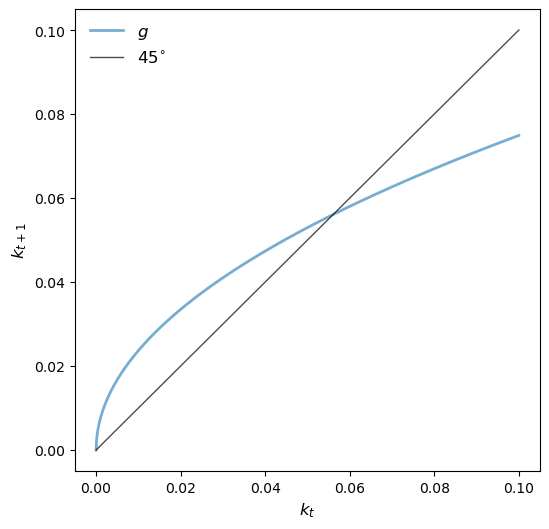

In [8]:
α, β = 0.5, 0.9
kmin, kmax = 0, 0.1
x = 1000
k_grid = np.linspace(kmin, kmax, x)
k_grid_next = np.empty_like(k_grid)

for i in range(x):
    k_grid_next[i] = k_update(k_grid[i], α, β)

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

In [9]:
k_star = ((β * (1 - α))/(1 + β))**(1/(1-α))
R_star = (α/(1 - α)) * ((1 + β) / β)

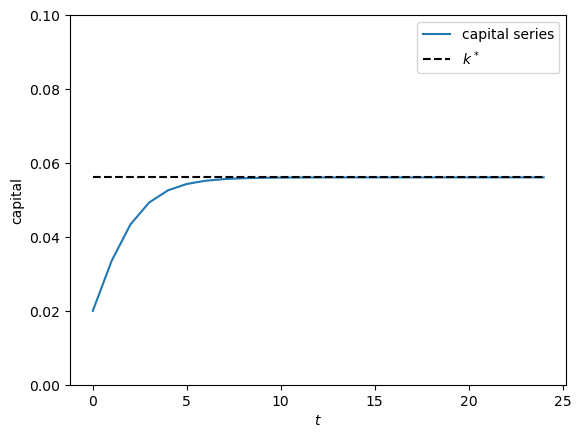

In [10]:
ts_length = 25
k_series = np.empty(ts_length)
k_series[0] = 0.02
for t in range(ts_length - 1):
    k_series[t+1] = k_update(k_series[t], α, β)

fig, ax = plt.subplots()
ax.plot(k_series, label="capital series")
ax.plot(range(ts_length), np.full(ts_length, k_star), 'k--', label="$k^*$")
ax.set_ylim(0, 0.1)
ax.set_ylabel("capital")
ax.set_xlabel("$t$")
ax.legend()
plt.show()

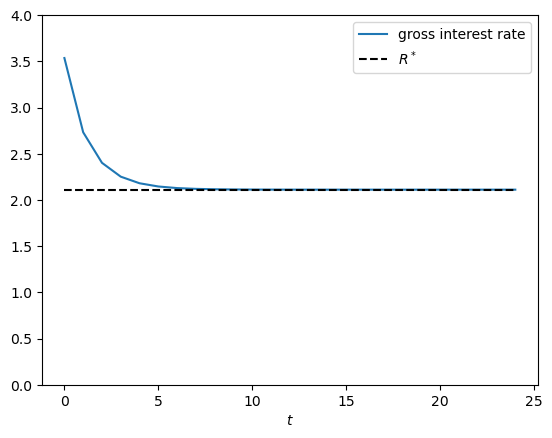

In [11]:
R_series = α * k_series**(α - 1)

fig, ax = plt.subplots()
ax.plot(R_series, label="gross interest rate")
ax.plot(range(ts_length), np.full(ts_length, R_star), 'k--', label="$R^*$")
ax.set_ylim(0, 4)
ax.set_xlabel("$t$")
ax.legend()
plt.show()

In [12]:
def crra(c, γ):
    return c**(1 - γ) / (1 - γ)

Model = namedtuple('Model', ['α',        # Cobb-Douglas parameter
                             'β',        # discount factor
                             'γ']        # parameter in CRRA utility
                   )

def create_olg_model(α=0.4, β=0.9, γ=0.5):
    return Model(α=α, β=β, γ=γ)

In [13]:
def capital_demand(R, model):
    return (α/R)**(1/(1-model.α)) 

In [14]:
def savings_crra(w, R, model):
    α, β, γ = model
    return w / (1 + β**(-1/γ) * R**((γ-1)/γ)) 

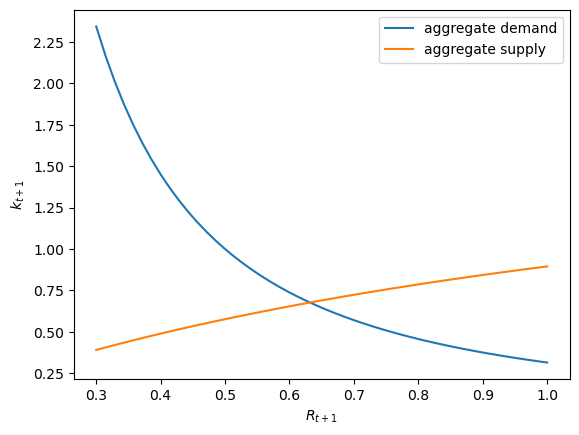

In [15]:
R_vals = np.linspace(0.3, 1)
model = create_olg_model()
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, model), 
        label="aggregate demand")
ax.plot(R_vals, savings_crra(w, R_vals, model), 
        label="aggregate supply")

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

In [16]:
def f(k_prime, k, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k**α
    a = α**(1-1/γ)
    b = k_prime**((α * γ - α + 1) / γ)
    p = k_prime + k_prime * β**(-1/γ) * a * b
    return p - z

In [17]:
def k_update(k, model):
    return optimize.newton(lambda k_prime: f(k_prime, k, model), 0.1)

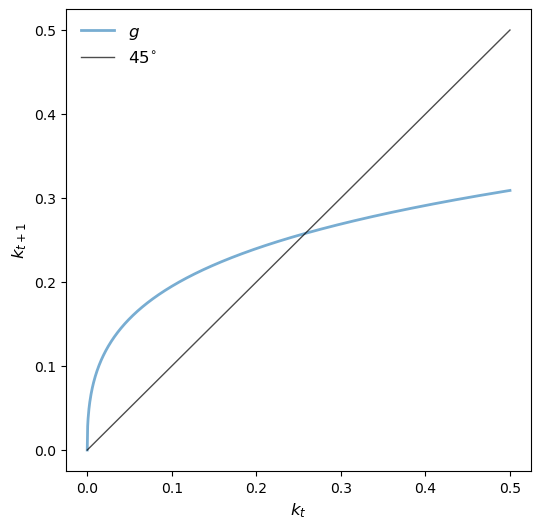

In [18]:
kmin, kmax = 0, 0.5
x = 1000
k_grid = np.linspace(kmin, kmax, x)
k_grid_next = np.empty_like(k_grid)

for i in range(x):
    k_grid_next[i] = k_update(k_grid[i], model)

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

In [19]:
def h(k_star, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k_star**α
    R1 = α ** (1-1/γ)
    R2 = k_star**((α * γ - α + 1) / γ)
    p = k_star + k_star * β**(-1/γ) * R1 * R2
    return p - z

In [20]:
k_star = optimize.newton(h, 0.2, args=(model,))
print(f"k_star = {k_star}")

k_star = 0.25788950250843484


In [21]:
ts_length = 10
k0 = np.array([0.001, 1.2, 2.6])

In [22]:
def simulate_ts(model, k0_values, ts_length):

    fig, ax = plt.subplots()

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for k_init in k0_values:
        ts[0] = k_init
        for t in range(1, ts_length):
            ts[t] = k_update(ts[t-1], model)
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %k_init)
    ax.plot(np.arange(ts_length), np.full(ts_length, k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

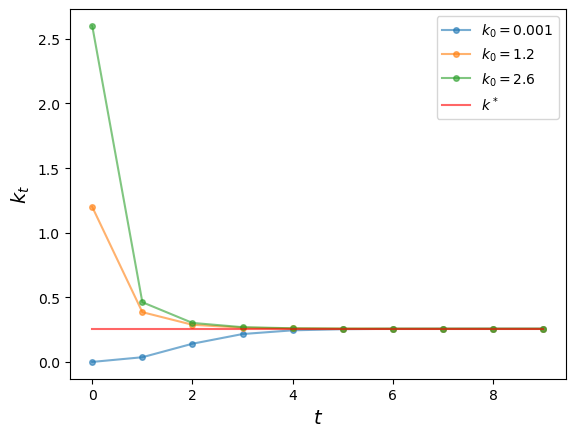

In [23]:
simulate_ts(model, k0, ts_length)